In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
# LogisticRegression -> 이진분류, 다항분류 때 사용
from sklearn.tree import DecisionTreeClassifier

In [29]:
wine = pd.read_csv("data/wine.csv")
print (wine.info())
print (wine.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB
None
           alcohol        sugar           pH        class
count  6497.000000  6497.000000  6497.000000  6497.000000
mean     10.491801     5.443235     3.218501     0.753886
std       1.192712     4.757804     0.160787     0.430779
min       8.000000     0.600000     2.720000     0.000000
25%       9.500000     1.800000     3.110000     1.000000
50%      10.300000     3.000000     3.210000     1.000000
75%      11.300000     8.100000     3.320000     1.000000
max      14.900000    65.800000     4.010000     1.000000


In [30]:
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [32]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(5197, 3) (1300, 3)
(5197,) (1300,)


In [33]:
ss = StandardScaler()
ss.fit(X_train)
train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

In [34]:
train_scaled[:5]

array([[ 0.01376574,  0.4646116 , -0.16888369],
       [ 1.60871671, -0.70299854,  0.26967864],
       [ 1.10504798, -0.70299854,  1.20945505],
       [ 1.0211032 , -0.89065017,  0.958848  ],
       [-0.99357172,  2.07007555, -0.67009777]])

In [35]:
lr = LogisticRegression()
lr.fit(train_scaled,y_train)

print(lr.score(train_scaled, y_train))
print(lr.score(test_scaled, y_test))

0.7808350971714451
0.7776923076923077


In [36]:
print(lr.coef_, lr.intercept_)

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


y = 0.51268071* x1 + 1.67335441* x2 + -0.68775646*x3 + 1.81773456

In [37]:
print(lr.predict_proba(train_scaled[:5]))

[[0.06189615 0.93810385]
 [0.21743898 0.78256102]
 [0.40706905 0.59293095]
 [0.45229377 0.54770623]
 [0.00530818 0.99469182]]


In [39]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled,y_train)

print(dt.score(train_scaled,y_train))
print(dt.score(test_scaled,y_test))

0.996921300750433
0.8592307692307692


In [41]:
from sklearn.tree import plot_tree

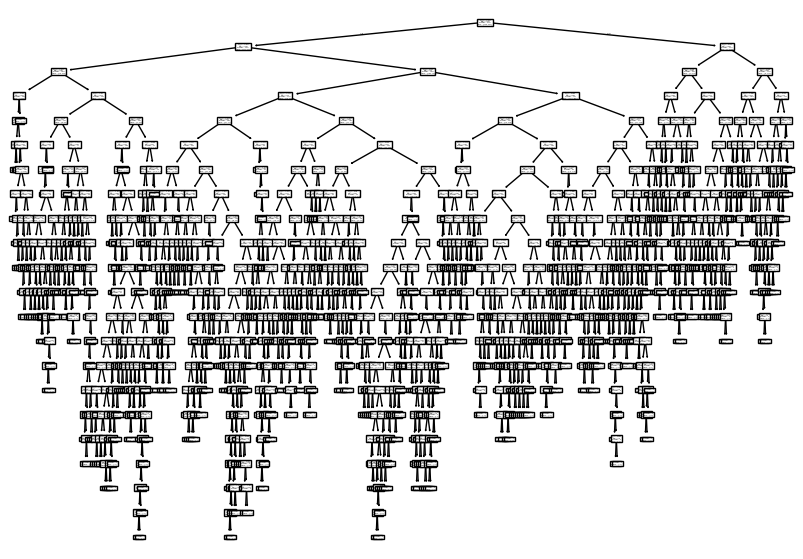

In [43]:
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

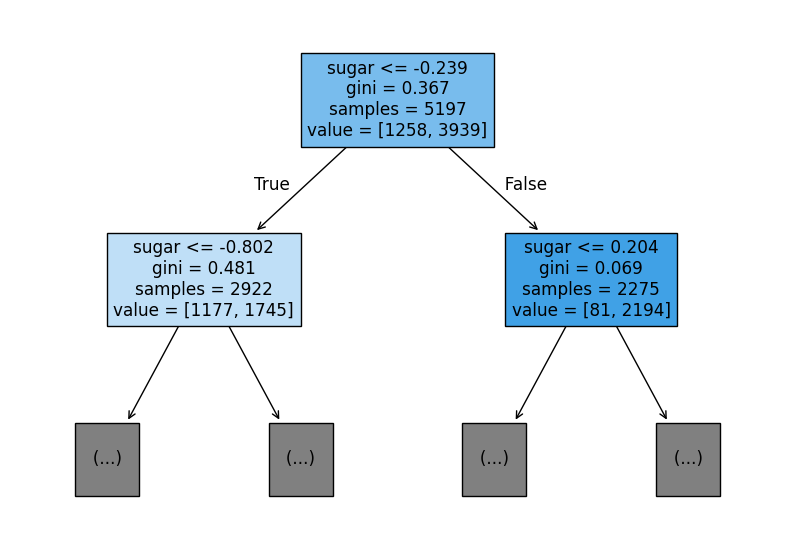

In [44]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, feature_names=['alcohol','sugar','pH'], filled=True)
plt.show()

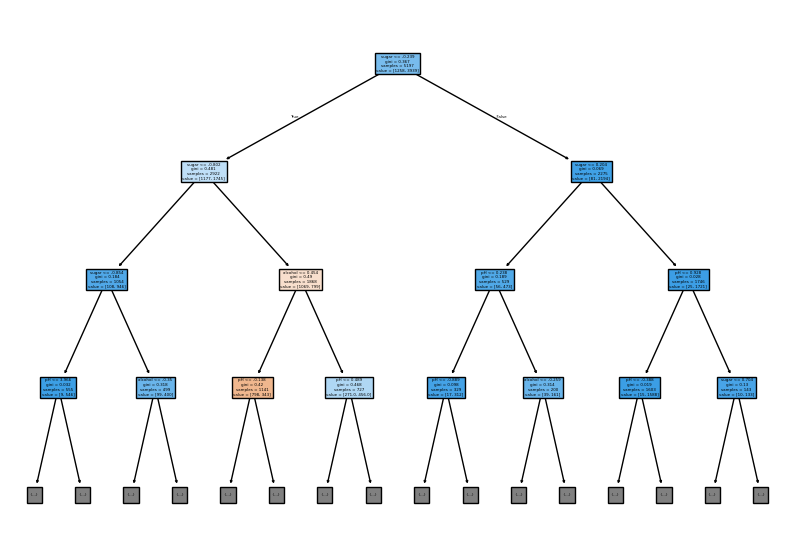

In [45]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=3, feature_names=['alcohol','sugar','pH'], filled=True)
plt.show()

In [46]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled,y_train)

print(dt.score(train_scaled,y_train))
print(dt.score(test_scaled,y_test))

0.8454877814123533
0.8415384615384616


In [47]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]
